#Calculadora de IMC com gráfico




### Importando bibliotecas

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

### Calculando o IMC:

In [ ]:
# Funções de boas-vindas aos usuários (User Experience).
def saudacao():
    print('Esta é a calculadora de IMC. Vamos usar seu peso e altura para calcular um índice importante para avaliar sua composição corporal.')


def avisos():
    print('Aviso: este cálculo de IMC não é recomendado para idosos, grávidas e pessoas muito musculosas. Nestes casos, devem-se procurar outros índices.')

# Função que determina o IMC.
def det_imc(peso, altura):
    imc = peso / altura ** 2
    return round(imc, 2)

# Categorias de IMC, que também serão usadas posteriormente.
categorias = ['Baixo peso', 'Peso normal', 'Sobrepeso', 'Obesidade grau I', 'Obesidade grau II', 'Obesidade grau III']


# Função que determina a categoria do IMC.
def det_cat(imc):
    if imc < 18.5:
        return categorias[0]
    if imc > 18.5 and imc < 24.9:
        return categorias[1]
    if imc > 24.9 and imc < 29.9:
        return categorias[2]
    if imc > 29.9 and imc < 34.9:
        return categorias[3]
    if imc > 34.9 and imc < 39.9:
        return categorias[4]
    if imc >= 40.0:
        return categorias[5]

# Chamada às funções de boas-vindas.
saudacao()
avisos()

# Pedindo peso e altura do usuário com validação.
peso_usuario = float(input('Vamos começar. Digite seu peso em quilogramas: '))
while not(peso_usuario > 15 and peso_usuario < 250):
  peso_usuario = float(input('Por favor, digite um valor coerente.'))

altura_usuario = float(input(
    'Agora, digite sua altura em metros (utilize ponto, não vírgula. Por ex.: 1.76 de altura). '))
while not(altura_usuario > 0.6 and altura_usuario < 2.5):
  altura_usuario = float(input('Por favor, digite um valor coerente.'))

# Chamada às funções de determinação.
imc_usuario = det_imc(peso_usuario, altura_usuario)
cat_usuario = det_cat(imc_usuario)

# Imprimindo mensagem na tela utilizando placeholders.
print("Caro usuário, seu IMC é {}. Por isso, você se enquadra na categoria '{}'. Veja o gráfico abaixo:".format(
    imc_usuario, cat_usuario))

Esta é a calculadora de IMC. Vamos usar seu peso e altura para calcular um índice importante para avaliar sua composição corporal.
Aviso: este cálculo de IMC não é recomendado para idosos, grávidas e pessoas muito musculosas. Nestes casos, devem-se procurar outros índices.
Vamos começar. Digite seu peso em quilogramas: 10
Por favor, digite um valor coerente.67
Agora, digite sua altura em metros (utilize ponto, não vírgula. Por ex.: 1.76 de altura). 0.5
Por favor, digite um valor coerente.0.6
Por favor, digite um valor coerente.1.76
Caro usuário, seu IMC é 21.63. Por isso, você se enquadra na categoria 'Peso normal'. Veja o gráfico abaixo:


### Gerando o gráfico

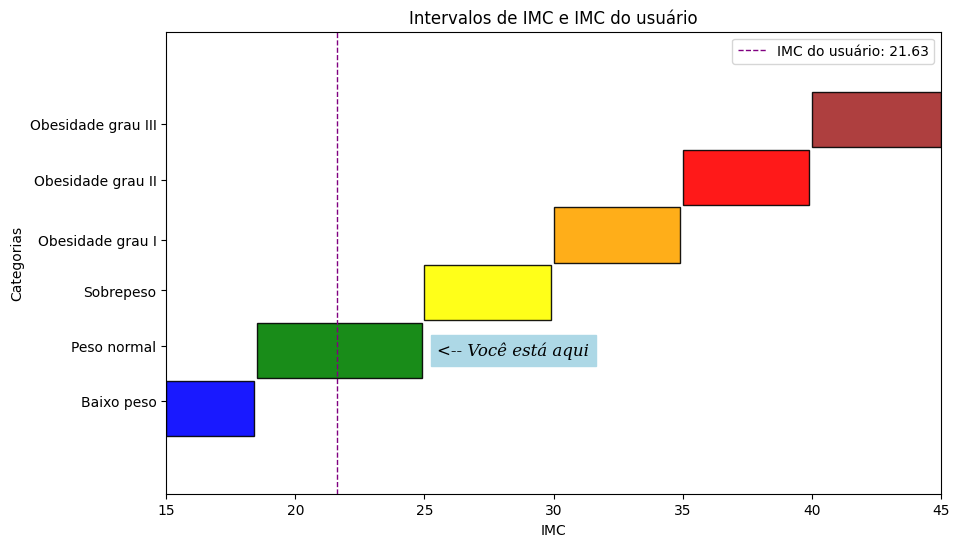

In [ ]:
# Intervalos para os retângulos coloridos do gráfico.
intervalos = [
    (15, 18.4, 'blue'),  # (início, fim, cor)
    (18.5, 24.9, 'green'),
    (25.0, 29.9, 'yellow'),
    (30.0, 34.9, 'orange'),
    (35.0, 39.9, 'red'),
    (40.0, 45.0, 'brown')
]

# Criação do gráfico.
fig, ax = plt.subplots(figsize=(10, 6))

# Adicionando linha vertical tracejada.
ax.axvline(x=imc_usuario, color='purple', linestyle='--', linewidth=1, label=f'IMC do usuário: {imc_usuario}')

# Adicionando retângulos coloridos com laço de repetição.
i = 1
for inicio, fim, cor in intervalos:
    ax.add_patch(patches.Rectangle((inicio, 12.5*i), fim-inicio, 12, edgecolor='black', facecolor=cor, alpha=0.9))
    i = i + 1
    # Argumentos de patches.Rectangle em ordem: começo do retângulo, largura, altura, cor da borda, cor do retângulo e contraste.

# Nomeando os eixos x e y, respectivamente.
ax.set_xlabel('IMC')
ax.set_ylabel('Categorias')

# Colocando os nomes das categorias no eixo y.
y_posicoes = [20, 32, 44, 55, 68, 80]
ax.set_yticks(y_posicoes)
ax.set_yticklabels(categorias)

# Ajustando as coordenadas para o aviso textual no gráfico.
if cat_usuario == 'Baixo peso':
  x_texto, y_texto = 19, 20
if cat_usuario == 'Peso normal':
  x_texto, y_texto = 25.5, 30
if cat_usuario == 'Sobrepeso':
  x_texto, y_texto = 30.5, 43
if cat_usuario == 'Obesidade grau I':
  x_texto, y_texto = 35.5, 55
if cat_usuario == 'Obesidade grau II':
  x_texto, y_texto = 40.5, 65
if cat_usuario == 'Obesidade grau III':
  x_texto, y_texto = 45.5, 80


# Dicionário para o estilo do aviso textual.
dic_estilo = {"backgroundcolor":"lightblue", "color":"black", "family": "serif",
              "size":12, "style":"italic","weight":"normal"}

# Criação do aviso textual propriamente dito.
plt.text(x_texto, y_texto, '<-- Você está aqui', fontdict=dic_estilo)

# Escala dos eixos x e y.
ax.set_xlim(15, 45)
ax.set_ylim(0, 100)

# Título do gráfico, impressão de 'IMC do usuário' e impressão na tela.
ax.set_title('Intervalos de IMC e IMC do usuário')
ax.legend()

plt.show()

### Fonte para os dados sobre o IMC: https://www.tuasaude.com/imc/

### Pesquisar sobre Diagrama de Gantt